In [1]:
'''
import libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

In [2]:
# !python3 -m pip install nltk
# !python3 -m nltk.downloader punkt
# !python3 -m nltk.downloader stopwords

# !python3 -m pip install spacy

In [3]:
'''
Load data
'''
data_dir = 'data/input/collection_with_abstracts.csv'
df = pd.read_csv(data_dir)
df.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,PMC11491427,NaN,10.3389/fnins.2024.1501636,NaN
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...


In [4]:
df

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,PMC11491427,NaN,10.3389/fnins.2024.1501636,NaN
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,10607521,The characteristics of epidemics and invasions...,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,NaN,NaN,10.1006/tpbi.1999.1432,In this paper we report the development of a h...
11446,10072741,Effects of sales promotion on smoking among U....,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,NaN,NaN,10.1006/pmed.1998.0410,OBJECTIVE: The purpose of this study was to ex...
11447,9200018,Hypertension in an inner-city minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,NaN,NaN,10.1097/00005082-199707000-00005,This study describes an inner-city elderly min...
11448,8039948,Aerosol transmission of a viable virus affecti...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,NaN,NaN,10.1007/BF01241802,A Gaussian diffusion model was applied to an e...


In [5]:
'''
Check for missing values
'''
df['Abstract'].isna().sum()

np.int64(213)

In [6]:
'''
check for duplicates
'''
df['DOI'].nunique() 

10969

In [7]:
'''
missing values in Abstract column
'''

nrow = df.shape[0]
nnullAb = df.Abstract.isna().sum()
(nnullAb/nrow ) * 100

np.float64(1.8602620087336246)

approx 1.86% of the data is missing in the Abstract column

In [8]:
# Drop rows where 'Abstract' column has missing values
print(f'df before removal::{df.shape}')
df_cleaned = df.dropna(subset=['Abstract'])
print(f'df after removal::{df_cleaned.shape}')
print(f'# rows removed = {df.shape[0] - df_cleaned.shape[0]}')

df before removal::(11450, 12)
df after removal::(11237, 12)
# rows removed = 213


In [9]:

# df[['DOI', 'Abstract']].isnull().sum()
# df_abs_nnan = df[df['Abstract'].isnull()]
# df_abs_nnan[['DOI', 'Abstract']].isna().sum()
# !python3 -m spacy download en_core_web_sm

# !python3 -m pip install --upgrade pip


In [103]:
df.columns

Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI',
       'Abstract'],
      dtype='object')

In [10]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""  # Return an empty string for NaN entries
    
    # Process the text using spaCy
    doc = nlp(text.lower())  # Convert to lowercase and process
    tokens = [token.text for token in doc if token.is_alpha]  # Keep only alphabetic tokens
    return ' '.join(tokens)

df_cleaned['clean_Abstract'] = df_cleaned['Abstract'].apply(preprocess_text)

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_17056/3725400477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clean_Abstract'] = df_cleaned['Abstract'].apply(preprocess_text)


In [11]:
df_cleaned.head(2)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,clean_Abstract
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...,purpose our purpose is to develop a computer v...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...,accurate segmentation of lesions from medical ...


In [12]:

# Define keywords for filtering
'''keywords = [
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network', 
    'machine learning model', 'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks'
    ]'''

keywords = [
    # Deep Learning Specific
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network',  
    'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks',
    
    # Computer Vision
    'computer vision', 'vision model', 'image processing', 
    'vision algorithms', 'object recognition', 'scene understanding',

    # Natural Language Processing
    'natural language processing', 'text mining', 'NLP', 
    'computational linguistics', 'language processing', 
    'text analytics', 'textual data analysis', 'text data analysis', 
    'text analysis', 'speech and language technology', 
    'language modeling', 'computational semantics',

    # Generative AI
    'generative artificial intelligence', 'generative AI', 
    'generative deep learning', 'generative models',

    # Large Language Models
    'large language model', 'transformer-based model', 
    'pretrained language model', 'generative language model', 
    'foundation model', 'state-of-the-art language model',

    # Multimodal Models
    'multimodal model', 'multimodal neural network', 
    'vision transformer', 'diffusion model', 
    'generative diffusion model', 'diffusion-based generative model', 
    'continuous diffusion model'
]

def filter_papers(text):
    return any(keyword in text for keyword in keywords)

In [13]:
# Filter relevant papers
df_cleaned['is_relevant'] = df_cleaned['clean_Abstract'].apply(filter_papers)
relevant_papers = df_cleaned[df_cleaned['is_relevant']]

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_17056/381664074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_relevant'] = df_cleaned['clean_Abstract'].apply(filter_papers)


In [14]:
df_cleaned.is_relevant.value_counts()  

is_relevant
True     6640
False    4597
Name: count, dtype: int64

In [15]:
relevant_papers.shape

(6640, 14)

In [16]:
relevant_papers.head(2)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,clean_Abstract,is_relevant
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...,purpose our purpose is to develop a computer v...,True
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...,accurate segmentation of lesions from medical ...,True


In [17]:
# Classifying methods based on keywords
def classify_method(text):
    if 'text mining' in text:
        return 'text mining'
    elif 'computer vision' in text:
        return 'computer vision'
    elif 'both' in text:
        return 'both'
    else:
        return 'other'

# Apply classification to relevant papers
relevant_papers['method_type'] = relevant_papers['clean_Abstract'].apply(classify_method)


/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_17056/742910186.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_papers['method_type'] = relevant_papers['clean_Abstract'].apply(classify_method)


In [18]:
methods_report = relevant_papers[['Title', 'method_type']].groupby('method_type').size().reset_index(name='count')

methods_report

,method_type,count
0,both,1318
1,computer vision,166
2,other,4813
3,text mining,343


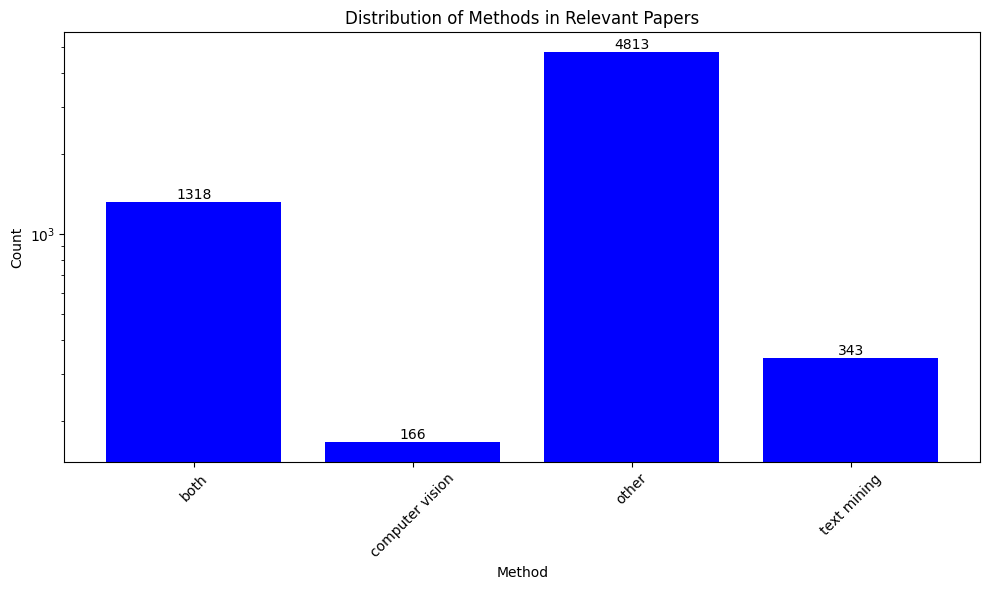

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar(methods_report['method_type'], methods_report['count'], color='blue')
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Distribution of Methods in Relevant Papers')
plt.xticks(rotation=45)
plt.yscale('log')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [21]:
# Function to extract method names from the abstract
def extract_methods(abstract):
    # Example patterns to identify methods
    
    method_keywords = [
    # Deep Learning Specific
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network', 
   'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks',
    
    # Computer Vision
    'computer vision', 'vision model', 'image processing', 
    'vision algorithms', 'object recognition', 'scene understanding',

    # Natural Language Processing
    'natural language processing', 'text mining', 'NLP', 
    'computational linguistics', 'language processing', 
    'text analytics', 'textual data analysis', 'text data analysis', 
    'text analysis', 'speech and language technology', 
    'language modeling', 'computational semantics',

    # Generative AI
    'generative artificial intelligence', 'generative AI', 
    'generative deep learning', 'generative models',

    # Large Language Models
    'large language model', 'transformer-based model', 
    'pretrained language model', 'generative language model', 
    'foundation model', 'state-of-the-art language model',

    # Multimodal Models
    'multimodal model', 'multimodal neural network', 
    'vision transformer', 'diffusion model', 
    'generative diffusion model', 'diffusion-based generative model', 
    'continuous diffusion model'
]
    
    # Find all methods mentioned in the abstract
    methods_found = [method for method in method_keywords if method in abstract]
    return ', '.join(methods_found) 

In [69]:
# Apply method extraction
relevant_papers['method_name'] = relevant_papers['clean_Abstract'].apply(extract_methods)
# Reset the index of the DataFrame
relevant_papers.reset_index(drop=True, inplace=True)
# Create a report containing the title and methods for each relevant paper
method_name_report = relevant_papers[['Title', 'method_name']]
method_name_report

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_17056/1156977812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_papers['method_name'] = relevant_papers['clean_Abstract'].apply(extract_methods)


,Title,method_name
0,Characterization of arteriosclerosis based on ...,"deep learning, computer vision"
1,Multi-scale input layers and dense decoder agg...,deep learning
2,An initial game-theoretic assessment of enhanc...,"deep learning, neural network"
3,Truncated M13 phage for smart detection of E. ...,"neural network, convolutional neural network, ..."
4,"CVS-Q teen: an adapted, reliable and validated...",computer vision
...,...,...
6635,The characteristics of epidemics and invasions...,diffusion model
6636,Effects of sales promotion on smoking among U....,diffusion model
6637,Hypertension in an inner-city minority population,diffusion model
6638,Aerosol transmission of a viable virus affecti...,diffusion model


In [102]:
row_id = 3
pprint(relevant_papers['method_name'][row_id])
pprint(relevant_papers['method_group'][row_id])

'neural network, convolutional neural network, image processing'
'Deep Learning'


In [100]:
from pprint import pprint
pprint(relevant_papers['Abstract'][row_id])

('Objective. Analysis of ophthalmological and musculoskeletal changes '
 'secondary to the use of electronic devices with digital screen, such as '
 'smartphones, laptops, computers or tablets. Material and Methods. This paper '
 'represents is a prospective observational study of 35 participants with ages '
 'between 6 and 17. The ophthalmological exam was carried out for all '
 'participants in the Ophthalmological Clinic of "Sf. Spiridon" Emergency '
 'Hospital, Iaşi, and the exam of musculoskeletal disorders took place at "Sf. '
 'Maria" Pediatrics Hospital, Iaşi. A questionnaire including 14 questions was '
 'also distributed for the symptoms caused by the use of digital screen '
 'electronic devices. Results. The mean age of participants was 11,29 ± 3,54 '
 'years, predominantly female children (62,9%). Convergence insufficiency has '
 'been identified in all patients with accommodative disorders and in 18.2% of '
 'the children with amblyopia (p = 0.001). The frequency of cases 

In [54]:
pprint(df_cleaned['clean_Abstract'][1])

('purpose our purpose is to develop a computer vision approach to quantify '
 'intra arterial thickness on digital pathology images of kidney biopsies as a '
 'computational biomarker of arteriosclerosis approach the severity of the '
 'arteriosclerosis was scored to in arteries from trichrome stained whole '
 'slide images wsis of kidney biopsies and the outer contours of the media '
 'intima and lumen were manually delineated by a renal pathologist we then '
 'developed a multi class deep learning dl framework for segmenting the '
 'different intra arterial compartments training dataset arteries from wsis '
 'testing dataset arteries from wsis subsequently we employed radial sampling '
 'and made measurements of media and intima thickness as a function of '
 'spatially encoded polar coordinates throughout the artery pathomic features '
 'were extracted from the measurements to collectively describe the arterial '
 'wall characteristics the technique was first validated through numeri

In [56]:
relevant_papers.head(1)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,clean_Abstract,is_relevant,method_type,method_name,method_group
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...,purpose our purpose is to develop a computer v...,True,computer vision,"deep learning, computer vision",Deep Learning


In [23]:
method_name_report.head(11)

,Title,method_name
1,Characterization of arteriosclerosis based on ...,"deep learning, computer vision"
2,Multi-scale input layers and dense decoder agg...,deep learning
3,An initial game-theoretic assessment of enhanc...,"deep learning, neural network"
4,Truncated M13 phage for smart detection of E. ...,"neural network, convolutional neural network, ..."
6,"CVS-Q teen: an adapted, reliable and validated...",computer vision
7,Setting up an institutional OMERO environment ...,image processing
9,Health Warnings on Instagram Advertisements fo...,computer vision
11,Classification of SARS-CoV-2 sequences as reco...,image processing
13,Artificial intelligence-driven automated lung ...,"deep learning, computer vision"
14,Cross-modal Transfer Learning Based on an Impr...,deep learning


In [25]:
(method_name_report.method_name.value_counts())

method_name
deep learning                                                                                 1220
neural network                                                                                 927
natural language processing, language processing                                               880
neural network, artificial neural network                                                      649
text mining                                                                                    293
                                                                                              ... 
multilayer perceptron, natural language processing, language processing                          1
neural network, text analysis                                                                    1
natural language processing, language processing, text data analysis                             1
neural network, recurrent neural network, natural language processing, language processing       

In [27]:
# method_name_report.method_name.unique().tolist()

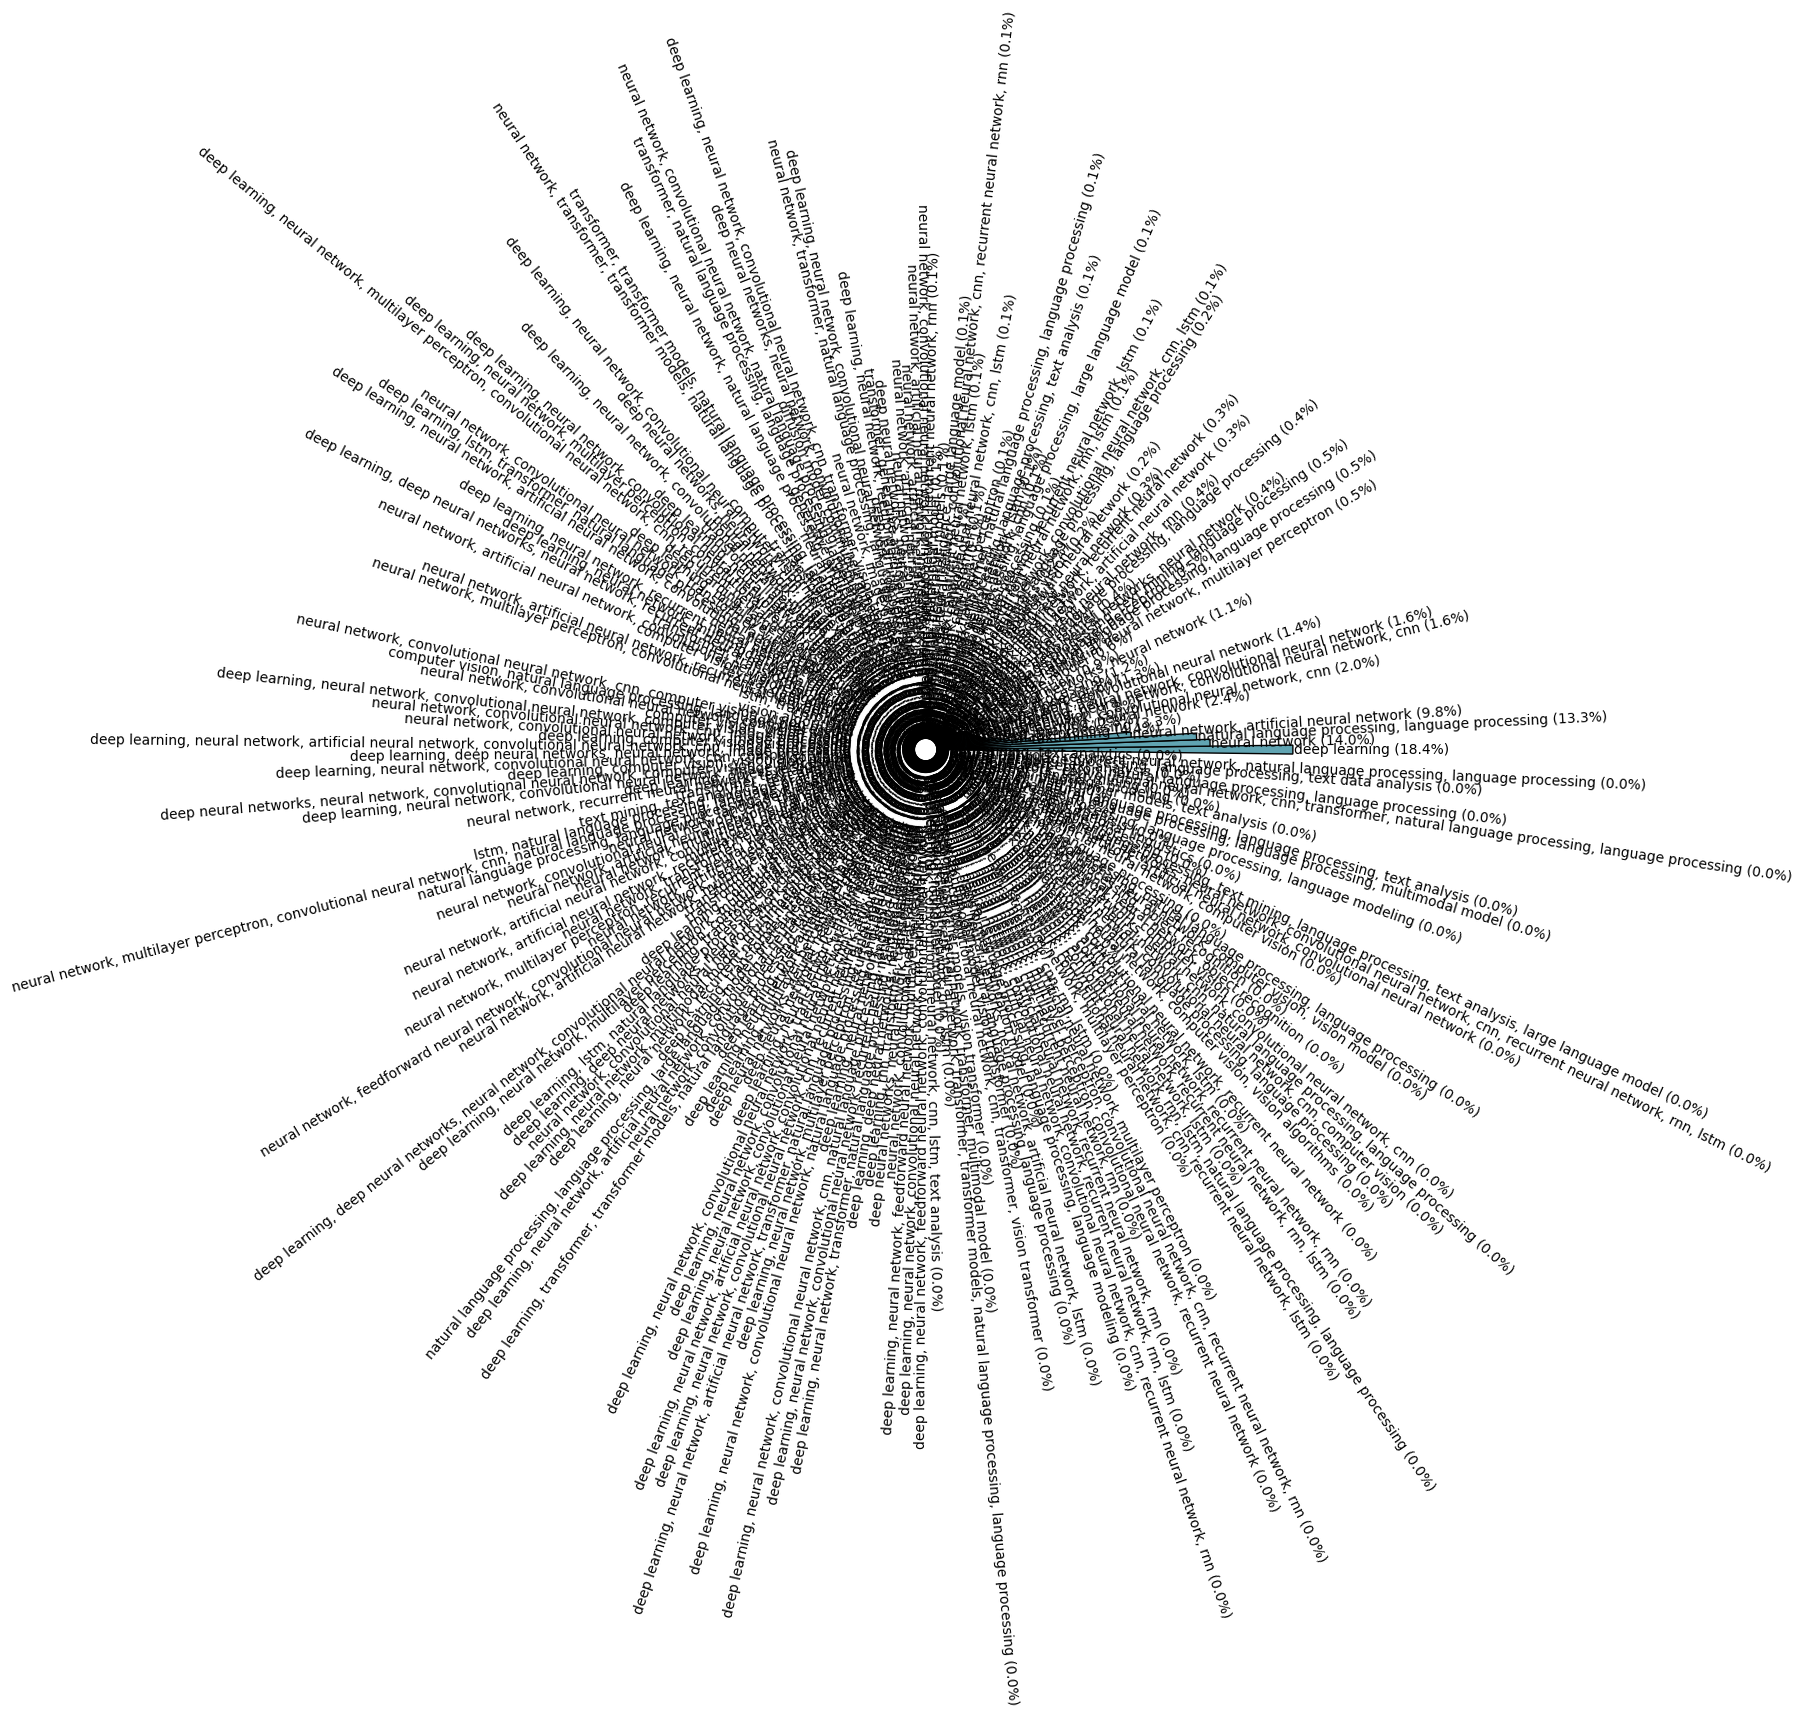

In [35]:
# First, we need to count the occurrences of each method_name
df_counts = relevant_papers['method_name'].value_counts().reset_index()
df_counts.columns = ['Unique_cat', 'counts']

# Plotting function to visualize the categories of the method names
def circular_bar(df, col_name, col_counts):
    # Initialize the figure
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    # Set the coordinates limits
    upperLimit = 100
    lowerLimit = 40

    maxi = df[col_counts].max()
    slope = 1  # Scaling factor
    heights = slope * df[col_counts] + lowerLimit

    # Compute the width of each bar. Total width = 2*Pi
    width = 2 * np.pi / len(df.index)

    total_count = df[col_counts].sum() # Total number of papers
    # Compute the angle for each bar
    indexes = list(range(len(df.index)))
    angles = [index * width for index in indexes]

    # Draw bars
    bars = ax.bar(
        x=angles,
        height=heights,
        width=width,
        bottom=lowerLimit,
        linewidth=1,
        edgecolor="black",
        color="#61a4b2"
    )

    # Label padding
    labelPadding = 4

    # Add labels
    for bar, angle, height, label in zip(bars, angles, heights, df[col_name]):
        # Determine rotation for the labels
        rotation = np.rad2deg(angle)

        # Adjust alignment based on angle
        alignment = "left" if angle < np.pi / 2 or angle >= 3 * np.pi / 2 else "right"
        if alignment == "right":
            rotation += 180

        percentage = (height - lowerLimit) / total_count * 100  # Calculate percentage based on height
        label_with_percentage = f"{label} ({percentage:.1f}%)"  
        # Finally add the labels
        ax.text(
            x=angle,
            y=lowerLimit + bar.get_height() + labelPadding,
            s=label_with_percentage,
            ha=alignment,
            va='center',
            rotation=rotation,
            rotation_mode="anchor"
        )

    plt.show()

# Applying the function on the extracted category dataset
circular_bar(df_counts, 'Unique_cat', 'counts')


In [28]:
# Define keyword categories
method_keywords = {
    'Deep Learning': [
        'deep learning', 'deep neural networks', 'neural network', 
        'artificial neural network', 'feedforward neural network', 
        'neural net algorithm', 'multilayer perceptron', 
        'convolutional neural network', 'cnn', 'recurrent neural network', 
        'rnn', 'long short-term memory network', 'lstm', 
        'transformer', 'transformer models', 'self-attention models', 
        'attention-based neural networks'
    ],
    'Computer Vision': [
        'computer vision', 'vision model', 'image processing', 
        'vision algorithms', 'object recognition', 'scene understanding'
    ],
    'Natural Language Processing': [
        'natural language processing', 'text mining', 'NLP', 
        'computational linguistics', 'language processing', 
        'text analytics', 'textual data analysis', 'text data analysis', 
        'text analysis', 'speech and language technology', 
        'language modeling', 'computational semantics'
    ],
    'Generative AI': [
        'generative artificial intelligence', 'generative AI', 
        'generative deep learning', 'generative models'
    ],
    'Large Language Models': [
        'large language model', 'transformer-based model', 
        'pretrained language model', 'generative language model', 
        'foundation model', 'state-of-the-art language model'
    ],
    'Multimodal Models': [
        'multimodal model', 'multimodal neural network', 
        'vision transformer', 'diffusion model', 
        'generative diffusion model', 'diffusion-based generative model', 
        'continuous diffusion model'
    ]
}


In [29]:

# Function to categorize method names
def categorize_method(method_name):
    for category, keywords in method_keywords.items():
        if any(keyword in method_name for keyword in keywords):
            return category
    return 'Other'  # Default category if no match is found

In [30]:
relevant_papers['method_group'] = relevant_papers['method_name'].apply(categorize_method)

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_17056/2664758040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_papers['method_group'] = relevant_papers['method_name'].apply(categorize_method)


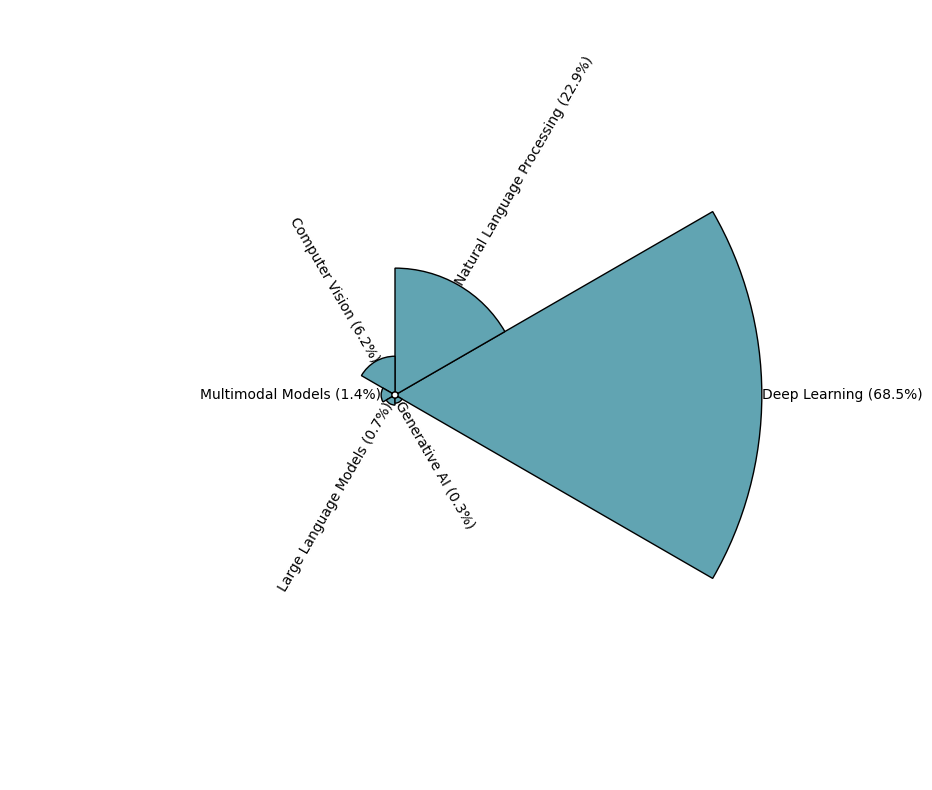

In [36]:
# First, we need to count the occurrences of each method_name
df_counts = relevant_papers['method_group'].value_counts().reset_index()
df_counts.columns = ['Unique_cat', 'counts']

# Applying the function on the extracted category dataset
circular_bar(df_counts, 'Unique_cat', 'counts')

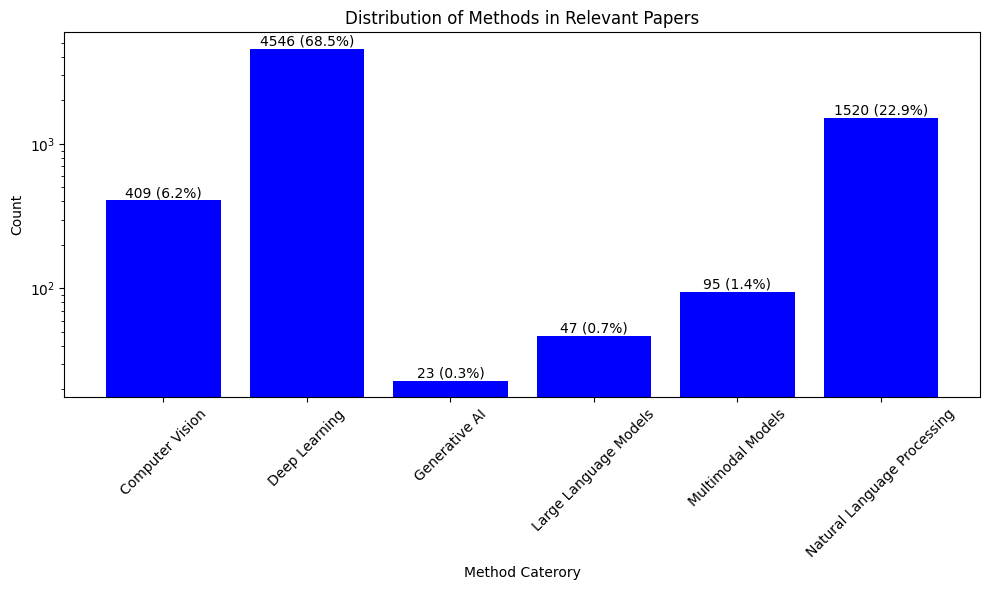

In [34]:
method_group_report = relevant_papers[['Title', 'method_group']].groupby('method_group').size().reset_index(name='count')



plt.figure(figsize=(10, 6))
bars = plt.bar(method_group_report['method_group'], method_group_report['count'], color='blue')
plt.xlabel('Method Caterory')   
plt.ylabel('Count')
plt.title('Distribution of Methods in Relevant Papers')
plt.xticks(rotation=45)
plt.yscale('log')

## Calculate the total count for percentage calculation
total_count = method_group_report['count'].sum()

# Adding value labels and percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_count) * 100  # Calculate percentage
    # Format the label to show both value and percentage
    label = f'{int(yval)} ({percentage:.1f}%)'
    
    plt.text(bar.get_x() + bar.get_width()/2, yval, label, ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [3]:
0.5 * 0.5, 0.5 * 0.1, 0.5 * 0.7

(0.25, 0.05, 0.35)

In [ ]:
STOP

In [ ]:
# Extract method names
def extract_method_name(text):
    cnn_keywords = ['convolutional', 'cnn', 'convolutional neural network']
    for keyword in cnn_keywords:
        if keyword in text:
            return 'Convolutional Neural Network'
        elif 'rnn' in text:
            return 'Recurrent Neural Network'
        return 'Unknown Method'

    '''if 'cnn' in text:
        return 'Convolutional Neural Network'
    elif 'rnn' in text:
        return 'Recurrent Neural Network'
    return 'Unknown Method'''

relevant_papers['method_name'] = relevant_papers['processed_text'].apply(extract_method_name)

# Save the relevant papers
relevant_papers.to_csv('./data/output/filtered_relevant_papers.csv', index=False)

print("Filtered relevant papers have been saved to './data/output/filtered_relevant_papers.csv'.")


In [ ]:
relevant_papers['method_name'].value_counts()

In [29]:
#Extracting the categories and the values counts
cat = relevant_papers['method_name'].value_counts(normalize=True, sort=False)*1000
df_counts = cat.rename_axis('Unique_cat').to_frame('counts')
df_counts= df_counts.reset_index()

In [ ]:
#Plotting function visualize the categories of the news articles

def circular_bar(df, col_name, col_counts):
    # initialize the figure
    plt.figure(figsize=(15,20))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')


    # Set the coordinates limits
    upperLimit = 100
    lowerLimit = 40

    maxi = df[col_counts].max()
    slope = 1 # (maxi - lowerLimit) / maxi
    heights = slope * df[col_counts] + lowerLimit

    # Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / len(df.index)

    # Compute the angle each bar is centered on:
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    angles
    # Draw bars
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=1, 
        edgecolor="black",
        color="#61a4b2",
    )

    # little space between the bar and the label
    labelPadding = 4

    # Add labels
    for bar, angle, height, label in zip(bars,angles, heights, df[col_name]):

    # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

    # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

    # Finally add the labels
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.show()


#Applying the function on the extracted category dataset
circular_bar(df_counts, 'Unique_cat', 'counts')

In [ ]:
relevant_papers['label'] = relevant_papers['is_relevant'].astype(int)

In [ ]:
relevant_papers['label'].value_counts()